In [2]:
#5.2 합성곱 신경망 맛보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

2024-09-12 08:42:19.954614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 08:42:21.339248: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-12 08:42:21.339453: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-12 08:42:21.343362: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-12 08:42:21.604525: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [2]:
# GPU 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"사용 가능한 GPU 장치: {gpus}")
else:
    print("GPU가 감지되지 않았습니다. CPU를 사용합니다.")

사용 가능한 GPU 장치: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

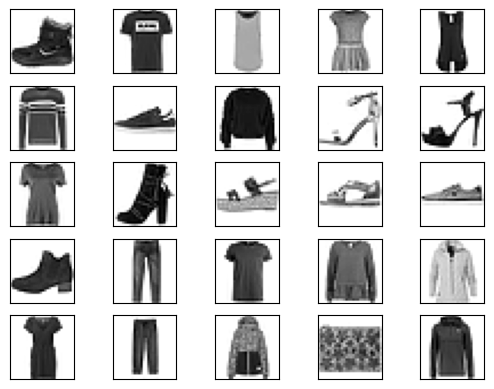

In [7]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)
model.evaluate(x_test,  y_test, verbose=2)

2024-09-12 08:25:09.095380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 08:25:09.097515: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-12 08:25:09.222698: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 08:25:09.222755: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-12 08:25:09.222782: I tensorflow/core/common_runtime/pluggable_device/pluggab

Epoch 1/20
   1/1875 [..............................] - ETA: 15:21 - loss: 2.4881 - accuracy: 0.1250

2024-09-12 08:25:11.862495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 22s 11ms/step - loss: 0.5245 - accuracy: 0.8133
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3997 - accuracy: 0.8536
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3659 - accuracy: 0.8660
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3460 - accuracy: 0.8712
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3270 - accuracy: 0.8805
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3159 - accuracy: 0.8826
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3065 - accuracy: 0.8858
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2998 - accuracy: 0.8881
Epoch 9/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2903 - accuracy: 0.8906
Epoch 10/20
1875/1875 [==============================] - 29s 16ms/step - lo

2024-09-12 08:32:42.744621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 08:32:42.774928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 08:32:42.774994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-12 08:32:42.776470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 08:32:42.776544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

313/313 - 1s - loss: 0.3438 - accuracy: 0.8885 - 1s/epoch - 4ms/step


[0.343764066696167, 0.8884999752044678]

In [9]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [10]:
# model_with_conv = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10,  activation='softmax')
# ])

# model_with_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

합성곱 신경망(CNN)으로 분석하기

In [11]:
model_with_conv2 = Sequential()
model_with_conv2.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_with_conv2.add(MaxPooling2D((2, 2), strides=2))
model_with_conv2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_with_conv2.add(MaxPooling2D((2, 2), strides=2))
model_with_conv2.add(Flatten())
model_with_conv2.add(Dense(128, activation='relu'))
model_with_conv2.add(Dense(10,  activation='softmax'))
model_with_conv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/user/miniforge3/envs/tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_with_conv2.fit(X_train_final, y_train, epochs=10)
model_with_conv2.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.5394 - loss: 1.2467
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.7874 - loss: 0.5779
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8190 - loss: 0.5081
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8346 - loss: 0.4601
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8455 - loss: 0.4253
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8527 - loss: 0.3996
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8625 - loss: 0.3814
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8657 - loss: 0.3757
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8682 - loss: 0.3634
Epoch 10/10
 118/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8724 - loss: 0.3445

In [4]:
# pip install scikit_image

In [5]:
# <노트>
# pip install scikit_image: 노트의 내용을 실습하기 위해서는 scikit_image 라이브러리를 설치해야합니다
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [6]:
def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

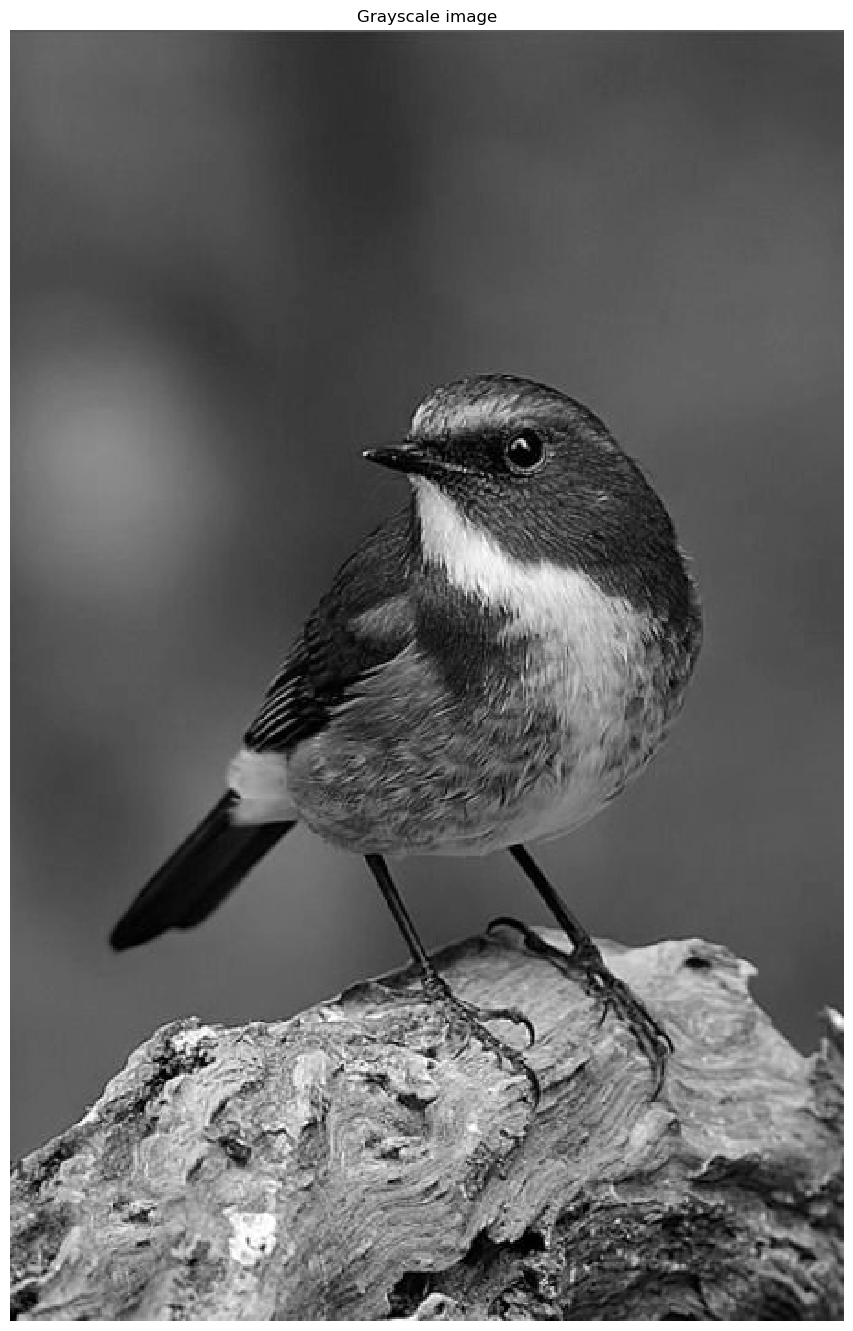

In [8]:
image_gs = imread('./bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [9]:
print_image_summary(image_gs, ['G'])
# </노트>

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [10]:
#5.3 전이학습
# 5.3.1 특성추출(Feature Extractor) 기법

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
base_model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

2024-09-12 08:45:03.437981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 08:45:03.439353: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-12 08:45:03.541338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 08:45:03.541390: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-12 08:45:03.541417: I tensorflow/core/common_runtime/pluggable_device/pluggab

102967424/102967424 [==============================] - 4s 0us/step


In [13]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [15]:
base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_1 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [22]:
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "./catanddog/train"
valid_dir = "./catanddog/validation"


train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,
          epochs=2000,
          validation_data=valid_generator,
          verbose=2, callbacks=[early_stopping_callback, checkpointer])

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/2000


2024-09-12 09:55:39.084839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 09:55:39.610381: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 09:55:39.610453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-12 09:55:51.737597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 09:55:52.212967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to


Epoch 1: saving model to ./model/01-0.5000.keras
13/13 - 19s - loss: 0.6932 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 19s/epoch - 1s/step
Epoch 2/2000

Epoch 2: saving model to ./model/02-0.4796.keras
13/13 - 12s - loss: 0.6931 - accuracy: 0.5325 - val_loss: 0.6932 - val_accuracy: 0.4796 - 12s/epoch - 898ms/step
Epoch 3/2000

Epoch 3: saving model to ./model/03-0.5000.keras
13/13 - 12s - loss: 0.6931 - accuracy: 0.5169 - val_loss: 0.6932 - val_accuracy: 0.5000 - 12s/epoch - 908ms/step
Epoch 4/2000

Epoch 4: saving model to ./model/04-0.5000.keras
13/13 - 12s - loss: 0.6931 - accuracy: 0.5247 - val_loss: 0.6932 - val_accuracy: 0.5000 - 12s/epoch - 926ms/step
Epoch 5/2000

Epoch 5: saving model to ./model/05-0.5000.keras
13/13 - 12s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 12s/epoch - 920ms/step
Epoch 6/2000

Epoch 6: saving model to ./model/06-0.5000.keras
13/13 - 12s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6932 - val_ac

Epoch 48/2000

Epoch 48: saving model to ./model/48-0.5000.keras
13/13 - 14s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.6936 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 49/2000

Epoch 49: saving model to ./model/49-0.5000.keras
13/13 - 14s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.6936 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 50/2000

Epoch 50: saving model to ./model/50-0.5000.keras
13/13 - 14s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.6935 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 51/2000

Epoch 51: saving model to ./model/51-0.5000.keras
13/13 - 14s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.6935 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 52/2000

Epoch 52: saving model to ./model/52-0.5000.keras
13/13 - 14s - loss: 0.6918 - accuracy: 0.5273 - val_loss: 0.6935 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 53/2000

Epoch 53: saving model to ./model/53-0.5000.keras
13/13 - 15s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.

Epoch 95/2000

Epoch 95: saving model to ./model/95-0.5000.keras
13/13 - 14s - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6938 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 96/2000

Epoch 96: saving model to ./model/96-0.5000.keras
13/13 - 16s - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6938 - val_accuracy: 0.5000 - 16s/epoch - 1s/step
Epoch 97/2000

Epoch 97: saving model to ./model/97-0.5000.keras
13/13 - 16s - loss: 0.6913 - accuracy: 0.5273 - val_loss: 0.6937 - val_accuracy: 0.5000 - 16s/epoch - 1s/step
Epoch 98/2000

Epoch 98: saving model to ./model/98-0.5000.keras
13/13 - 15s - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6937 - val_accuracy: 0.5000 - 15s/epoch - 1s/step
Epoch 99/2000

Epoch 99: saving model to ./model/99-0.5000.keras
13/13 - 15s - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6937 - val_accuracy: 0.5000 - 15s/epoch - 1s/step
Epoch 100/2000

Epoch 100: saving model to ./model/100-0.5000.keras
13/13 - 17s - loss: 0.6913 - accuracy: 0.5273 - val_loss:

In [23]:
#한글깨짐 해결
import matplotlib as mpl
import matplotlib.pylab as plt
# from matplotlib import font_manager

# font_fname = 'C:/Windows/Fonts/malgun.ttf'
# font_family = font_manager.FontProperties(fname=font_fname).get_name()

# plt.rcParams["font.family"] = font_family
import koreanize_matplotlib

ModuleNotFoundError: No module named 'koreanize_matplotlib'

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
# 텐서플로 허브를 이용한 코드

In [ ]:
#pip install tensorflow_hub
# import tensorflow_hub as hub
# model = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
#                    input_shape=(224, 224, 3),
#                    trainable=False),
#     tf.keras.layers.Dense(2, activation='softmax')
# ])

In [ ]:
#pip install tensorflow_hub
import tensorflow_hub as hub
model = tf.keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False))
model.add(Dense(2, activation='softmax'))

In [ ]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
img=load_img('../chap5/data/bird.jpg')
data=img_to_array(img)

In [ ]:
#width_shift_range 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(width_shift_range=[-200,200])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# height_shift_range 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(height_shift_range=0.5)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# flip 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# rotation_range 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(rotation_range=90)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# brightness 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(brightness_range=[0.3,1.2])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# zoom 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(zoom_range=[0.4, 1.5])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
# 5.4 설명가능한 CNN(eXplainable CNN)
# 5.4.1 특성 맵 시각화

In [ ]:
#pip install keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
model= Sequential()
model.add(Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32))
model.add(MaxPooling2D())
model.add(Conv2D(activation='relu', kernel_size=(5,5), filters=64))
model.add(MaxPooling2D())
model.add(Conv2D(activation='relu', kernel_size=(5,5), filters=64))
model.add(MaxPooling2D())
model.add(Conv2D(activation='relu', kernel_size=(5,5), filters=64))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

In [ ]:
ins= model.inputs
outs= model.layers[0].output
feature_map= Model(inputs= ins, outputs= outs)
feature_map.summary()

In [ ]:
img=cv2.imread("../chap5/data/cat.jpg")
plt.imshow(img)

In [ ]:
img=cv2.resize(img,(100,100))
input_img= np.expand_dims(img, axis=0)
print(input_img.shape)
feature=feature_map.predict(input_img)
print(feature.shape)
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(feature[0,:,:,i])

In [ ]:
ins= model.inputs
outs= model.layers[2].output
feature_map= Model(inputs= ins, outputs= outs)
img=cv2.imread("../chap5/data/cat.jpg")
img=cv2.resize(img,(100,100))
input_img= np.expand_dims(img, axis=0)

feature=feature_map.predict(input_img)
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])

In [ ]:
ins= model.inputs
outs= model.layers[6].output
feature_map= Model(inputs= ins, outputs= outs)
img=cv2.imread("../chap5/data/cat.jpg")
img=cv2.resize(img,(100,100))
input_img= np.expand_dims(img, axis=0)

feature=feature_map.predict(input_img)
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])